# AutoParts-A.I-Classifier
##Autores: Juan Diego Sepulveda Herrera, Oscar Julian Rey, Diego Clavijo.




#Pipeline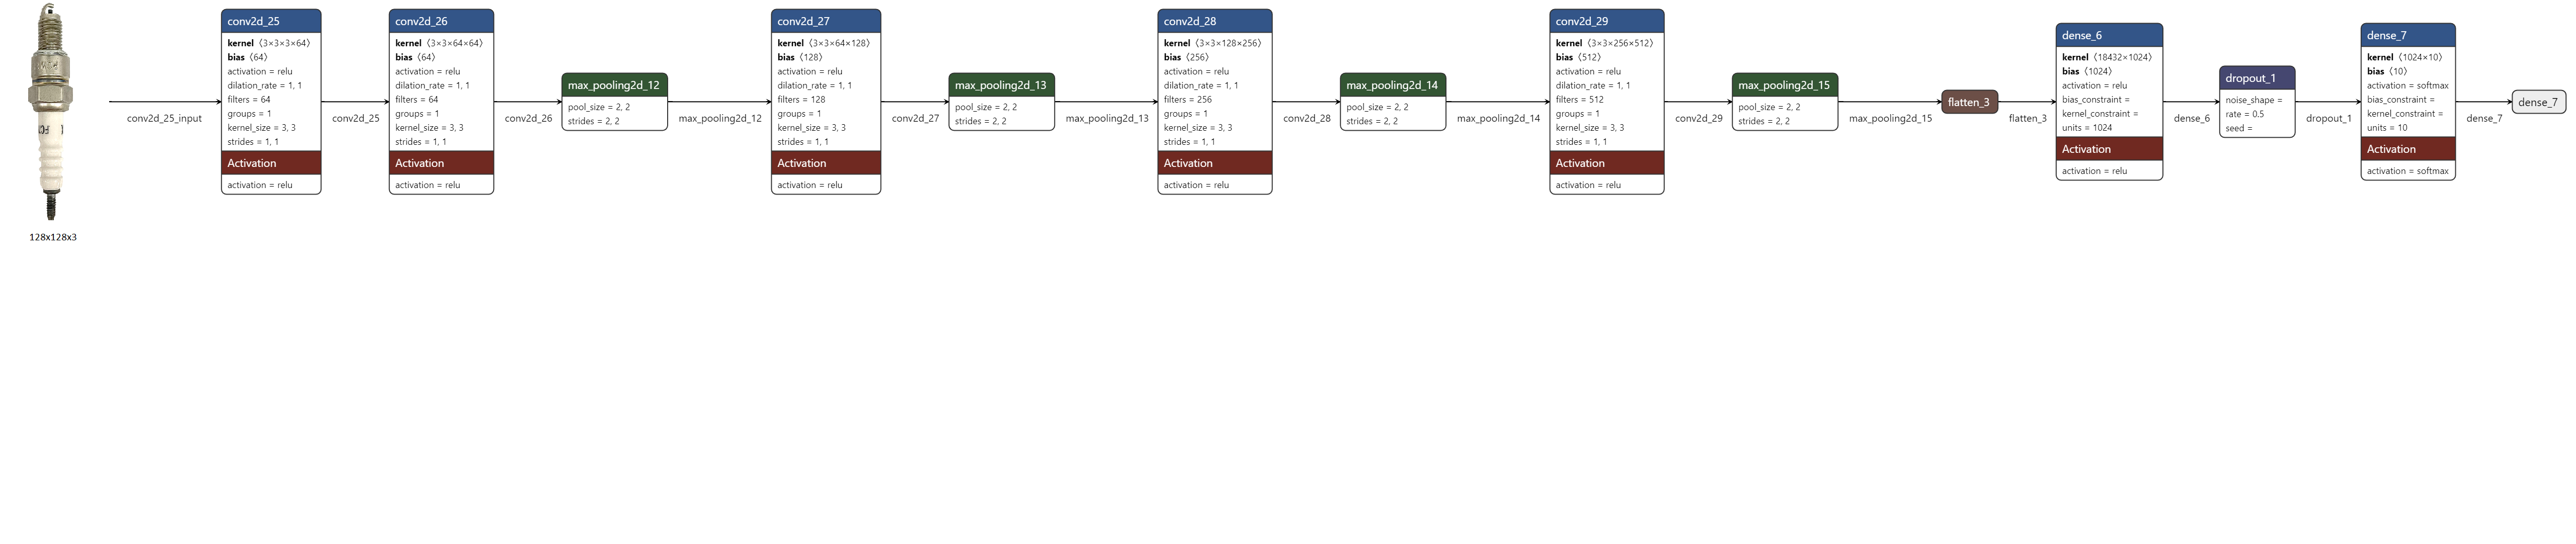

#Importar librerias

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
from sklearn.model_selection import train_test_split

In [2]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Crear el dataset

In [ ]:
# Directorio original del dataset
original_dataset_dir = '/content/drive/MyDrive/IA2/Proyecto_IA2/Proyecto_dataset'
base_dir = '/content/drive/MyDrive/IA2/Proyecto_IA2'

# Crear directorios base para entrenamiento y validación
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Obtener las clases (carpetas)
classes = os.listdir(original_dataset_dir)

# Dividir las imágenes en entrenamiento y validación
for class_name in classes:
    src_dir = os.path.join(original_dataset_dir, class_name)
    images = os.listdir(src_dir)
    train_images, validation_images = train_test_split(images, test_size=0.2, random_state=42)

    train_class_dir = os.path.join(train_dir, class_name)
    validation_class_dir = os.path.join(validation_dir, class_name)

    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(validation_class_dir, exist_ok=True)

    for img in train_images:
        shutil.copy(os.path.join(src_dir, img), os.path.join(train_class_dir, img))

    for img in validation_images:
        shutil.copy(os.path.join(src_dir, img), os.path.join(validation_class_dir, img))


#Cargar el dataset

In [3]:
train_dir = '/content/drive/MyDrive/IA2/Proyecto_IA2/train'
validation_dir = '/content/drive/MyDrive/IA2/Proyecto_IA2/validation'


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definimos el tamaño de las imágenes y el batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Preprocesamiento de datos y aumento de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 1201 images belonging to 10 classes.
Found 303 images belonging to 10 classes.


Imágenes de entrenamiento:


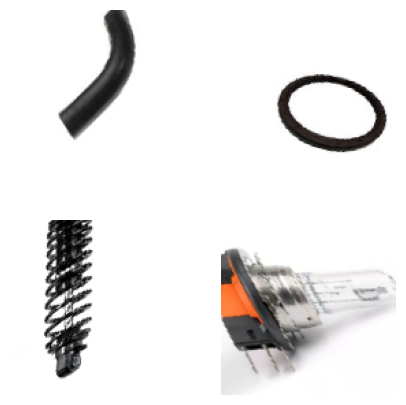

Imágenes de validación:


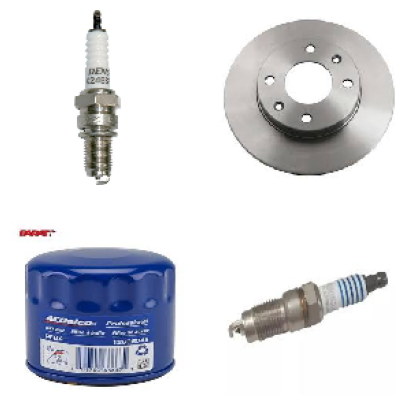

In [5]:
def plot_images(generator):
    sample_batch = next(generator)  # Obtener un batch del generador
    images, labels = sample_batch

    plt.figure(figsize=(5, 5))
    for i in range(4):  # Mostrar las primeras 9 imágenes del batch
        plt.subplot(2, 2, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

# Mostrar algunas imágenes de entrenamiento
print("Imágenes de entrenamiento:")
plot_images(train_generator)

# Mostrar algunas imágenes de validación
print("Imágenes de validación:")
plot_images(validation_generator)

#Modelo de prueba

In [ ]:
import tensorflow as tf

# Creamos el modelo
model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(32, (3,3), input_shape=(128,128,3), activation='relu'))
model_cnn.add(tf.keras.layers.MaxPooling2D(2,2))

model_cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model_cnn.add(tf.keras.layers.MaxPooling2D(2,2))

model_cnn.add(tf.keras.layers.Flatten())

model_cnn.add(tf.keras.layers.Dense(100, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compilar el modelo
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [ ]:
# Número de épocas
EPOCHS = 15

# Entrenamiento del modelo
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)


Epoch 1/15
38/38 [==============================] - 45s 1s/step - loss: 2.2191 - accuracy: 0.1823 - val_loss: 1.8784 - val_accuracy: 0.3300
Epoch 2/15
38/38 [==============================] - 47s 1s/step - loss: 1.7801 - accuracy: 0.3855 - val_loss: 1.7377 - val_accuracy: 0.4191
Epoch 3/15
38/38 [==============================] - 54s 1s/step - loss: 1.5197 - accuracy: 0.4638 - val_loss: 1.1980 - val_accuracy: 0.5974
Epoch 4/15
38/38 [==============================] - 45s 1s/step - loss: 1.3925 - accuracy: 0.5154 - val_loss: 1.2905 - val_accuracy: 0.5545
Epoch 5/15
38/38 [==============================] - 46s 1s/step - loss: 1.3102 - accuracy: 0.5604 - val_loss: 1.2337 - val_accuracy: 0.6073
Epoch 6/15
38/38 [==============================] - 48s 1s/step - loss: 1.1889 - accuracy: 0.5962 - val_loss: 0.9013 - val_accuracy: 0.6997
Epoch 7/15
38/38 [==============================] - 39s 1s/step - loss: 1.2107 - accuracy: 0.5878 - val_loss: 0.9050 - val_accuracy: 0.6865
Epoch 8/15
38/38 [==

In [ ]:
# Guardamos el modelo entrenado
model_cnn.save('model_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


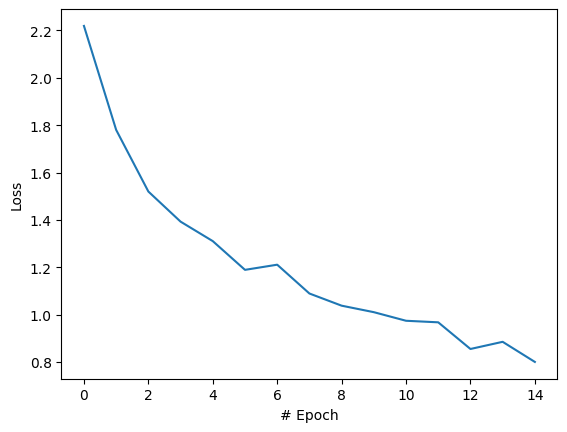

In [ ]:
# Ver la funcion de perdida en cada epoch
plt.xlabel("# Epoch");
plt.ylabel("Loss");
plt.plot(history_cnn.history["loss"]);

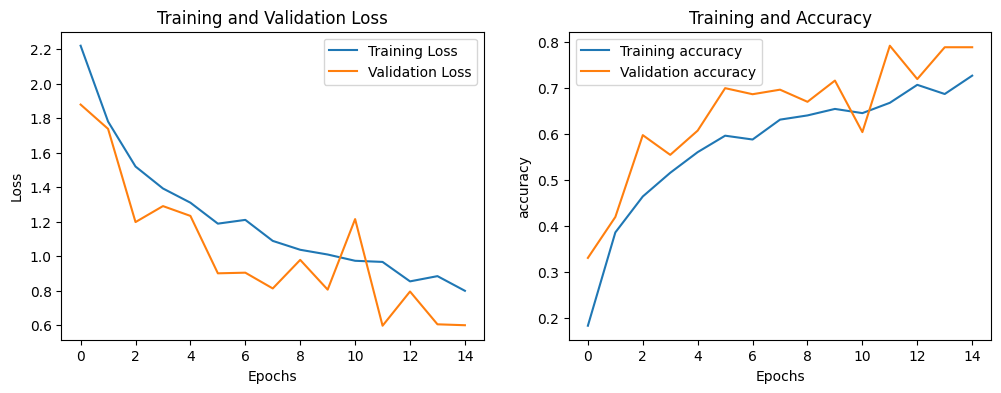

In [ ]:
# Graficar la pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Graficar la métrica BinaryIoU
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Training accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('Training and Accuracy')

plt.show()

In [ ]:
# Evaluar el modelo
cnn_eval = model_cnn.evaluate(validation_generator)
print(f'Model CNN - Loss: {cnn_eval[0]}, Accuracy: {cnn_eval[1]}')


10/10 [==============================] - 4s 425ms/step - loss: 0.6007 - accuracy: 0.7888
Model CNN - Loss: 0.6007445454597473, Accuracy: 0.7887789011001587


#VGG 19

In [ ]:
model_vgg19 = tf.keras.models.Sequential()

# Agregar capas convolucionales de VGG19
model_vgg19.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model_vgg19.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_vgg19.add(tf.keras.layers.MaxPooling2D((2, 2)))

model_vgg19.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model_vgg19.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model_vgg19.add(tf.keras.layers.MaxPooling2D((2, 2)))

model_vgg19.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model_vgg19.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model_vgg19.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Agregar capas densas de VGG19
model_vgg19.add(tf.keras.layers.Flatten())
model_vgg19.add(tf.keras.layers.Dense(512, activation='relu'))
model_vgg19.add(tf.keras.layers.Dropout(0.5))
model_vgg19.add(tf.keras.layers.Dense(10, activation='softmax'))  # Asumiendo que tenemos 10 clases

# Compilar el modelo
model_vgg19.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
# Número de épocas
EPOCHS = 15

# Entrenamiento del modelo
history_vgg19 = model_vgg19.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/15
38/38 [==============================] - 385s 10s/step - loss: 2.2904 - accuracy: 0.1341 - val_loss: 2.1762 - val_accuracy: 0.2046
Epoch 2/15
38/38 [==============================] - 383s 10s/step - loss: 2.0804 - accuracy: 0.2048 - val_loss: 1.8610 - val_accuracy: 0.2376
Epoch 3/15
38/38 [==============================] - 383s 10s/step - loss: 1.9451 - accuracy: 0.2515 - val_loss: 1.6888 - val_accuracy: 0.3531
Epoch 4/15
38/38 [==============================] - 382s 10s/step - loss: 1.8513 - accuracy: 0.2898 - val_loss: 1.5911 - val_accuracy: 0.4059
Epoch 5/15
38/38 [==============================] - 379s 10s/step - loss: 1.7518 - accuracy: 0.3381 - val_loss: 1.4248 - val_accuracy: 0.4587
Epoch 6/15
38/38 [==============================] - 382s 10s/step - loss: 1.5893 - accuracy: 0.3938 - val_loss: 1.4682 - val_accuracy: 0.4851
Epoch 7/15
38/38 [==============================] - 382s 10s/step - loss: 1.4953 - accuracy: 0.4363 - val_loss: 1.1178 - val_accuracy: 0.5842
Epoch 

In [ ]:
# Guardamos el modelo entrenado
model_vgg19.save('model_vgg19.h5')

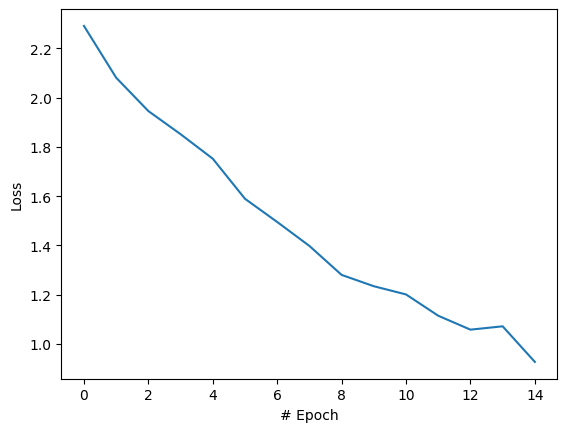

In [ ]:
# Ver la funcion de perdida en cada epoch
plt.xlabel("# Epoch");
plt.ylabel("Loss");
plt.plot(history_vgg19.history["loss"]);

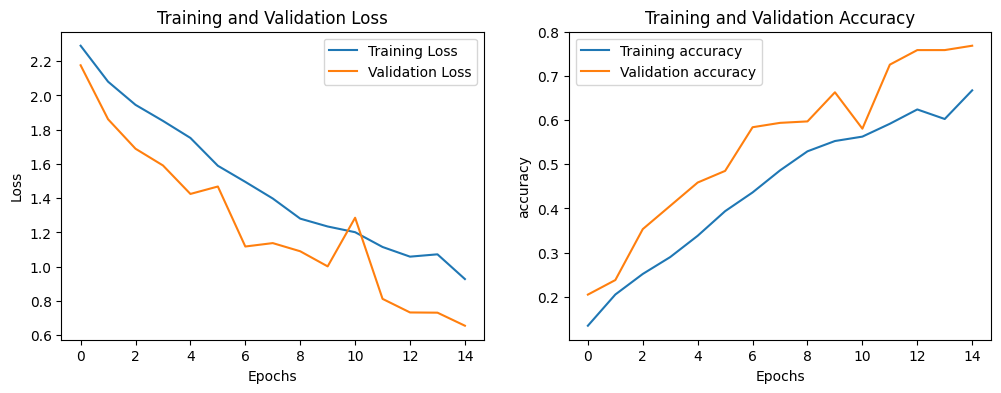

In [ ]:
# Graficar la pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_vgg19.history['loss'], label='Training Loss')
plt.plot(history_vgg19.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Graficar la métrica BinaryIoU
plt.subplot(1, 2, 2)
plt.plot(history_vgg19.history['accuracy'], label='Training accuracy')
plt.plot(history_vgg19.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

In [ ]:
vgg19_eval = model_vgg19.evaluate(validation_generator)
print(f'Model VGG19 - Loss: {vgg19_eval[0]}, Accuracy: {vgg19_eval[1]}')

10/10 [==============================] - 26s 3s/step - loss: 0.6552 - accuracy: 0.7690
Model VGG19 - Loss: 0.6551784873008728, Accuracy: 0.7689769268035889


realizar un analisis de implementacion de las diferentes cosas en el curso, batch normalizacion, etc

#Modelo CNN

In [ ]:
model_CNN =  tf.keras.models.Sequential()
model_CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model_CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))

model_CNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_CNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))

model_CNN.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_CNN.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))

model_CNN.add(tf.keras.layers.Flatten())
model_CNN.add(tf.keras.layers.Dense(256, activation='relu'))
model_CNN.add(tf.keras.layers.Dropout(0.25))
model_CNN.add(tf.keras.layers.BatchNormalization())
model_CNN.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compilar el modelo
model_CNN.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [ ]:
EPOCHS = 20

# Entrenamiento del modelo
history_model_CNN1 = model_CNN.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/20
38/38 [==============================] - 483s 13s/step - loss: 2.1219 - accuracy: 0.2606 - val_loss: 1.7039 - val_accuracy: 0.4059
Epoch 2/20
38/38 [==============================] - 190s 5s/step - loss: 1.5332 - accuracy: 0.4646 - val_loss: 1.4492 - val_accuracy: 0.4488
Epoch 3/20
38/38 [==============================] - 197s 5s/step - loss: 1.2967 - accuracy: 0.5512 - val_loss: 1.4512 - val_accuracy: 0.4950
Epoch 4/20
38/38 [==============================] - 186s 5s/step - loss: 1.1458 - accuracy: 0.6045 - val_loss: 0.8759 - val_accuracy: 0.7261
Epoch 5/20
38/38 [==============================] - 190s 5s/step - loss: 1.1257 - accuracy: 0.6045 - val_loss: 0.7331 - val_accuracy: 0.7756
Epoch 6/20
38/38 [==============================] - 168s 4s/step - loss: 1.0250 - accuracy: 0.6520 - val_loss: 1.3833 - val_accuracy: 0.5809
Epoch 7/20
38/38 [==============================] - 175s 5s/step - loss: 0.9977 - accuracy: 0.6436 - val_loss: 0.7488 - val_accuracy: 0.7426
Epoch 8/20
3

In [ ]:
# Guardamos el modelo entrenado
model_CNN.save('model_CNN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


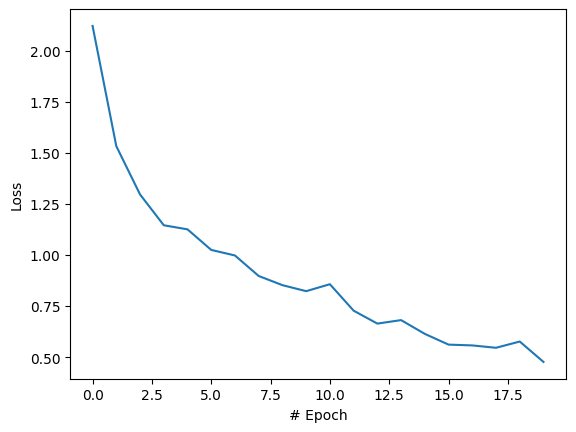

In [ ]:
# Ver la funcion de perdida en cada epoch
plt.xlabel("# Epoch");
plt.ylabel("Loss");
plt.plot(history_model_CNN1.history["loss"]);

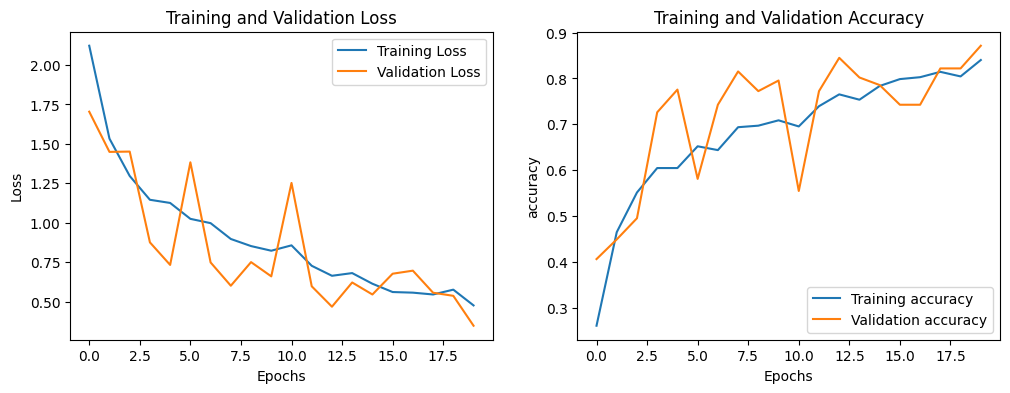

In [ ]:
# Graficar la pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_model_CNN1.history['loss'], label='Training Loss')
plt.plot(history_model_CNN1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Graficar la métrica BinaryIoU
plt.subplot(1, 2, 2)
plt.plot(history_model_CNN1.history['accuracy'], label='Training accuracy')
plt.plot(history_model_CNN1.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

#Modelo escogido: VGG 16

In [ ]:
# Crear el modelo basado en VGG16 desde cero
model_vgg16 = tf.keras.models.Sequential()

# Agregar capas convolucionales de VGG16
model_vgg16.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model_vgg16.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_vgg16.add(tf.keras.layers.MaxPooling2D((2, 2)))

model_vgg16.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model_vgg16.add(tf.keras.layers.MaxPooling2D((2, 2)))

model_vgg16.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model_vgg16.add(tf.keras.layers.MaxPooling2D((2, 2)))

model_vgg16.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model_vgg16.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Agregar capas densas de VGG16
model_vgg16.add(tf.keras.layers.Flatten())
model_vgg16.add(tf.keras.layers.Dense(1024, activation='relu'))
model_vgg16.add(tf.keras.layers.Dropout(0.5))
model_vgg16.add(tf.keras.layers.Dense(10, activation='softmax'))  # Asumiendo que tenemos 10 clases

# Compilar el modelo
model_vgg16.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
EPOCHS = 15

# Entrenamiento del modelo
history_vgg16 = model_vgg16.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/15
38/38 [==============================] - 284s 7s/step - loss: 2.2945 - accuracy: 0.1291 - val_loss: 2.0926 - val_accuracy: 0.2772
Epoch 2/15
38/38 [==============================] - 282s 7s/step - loss: 1.9609 - accuracy: 0.2490 - val_loss: 1.6135 - val_accuracy: 0.3927
Epoch 3/15
38/38 [==============================] - 283s 7s/step - loss: 1.6909 - accuracy: 0.3589 - val_loss: 1.3017 - val_accuracy: 0.5083
Epoch 4/15
38/38 [==============================] - 281s 7s/step - loss: 1.4576 - accuracy: 0.4555 - val_loss: 1.1211 - val_accuracy: 0.6040
Epoch 5/15
38/38 [==============================] - 283s 7s/step - loss: 1.3169 - accuracy: 0.5154 - val_loss: 1.0747 - val_accuracy: 0.6205
Epoch 6/15
38/38 [==============================] - 282s 7s/step - loss: 1.2628 - accuracy: 0.5562 - val_loss: 0.8761 - val_accuracy: 0.7294
Epoch 7/15
38/38 [==============================] - 287s 8s/step - loss: 1.1473 - accuracy: 0.5962 - val_loss: 0.8789 - val_accuracy: 0.6898
Epoch 8/15
38

In [ ]:
# Guardamos el modelo entrenado
model_vgg16.save('model_vgg16.h5')

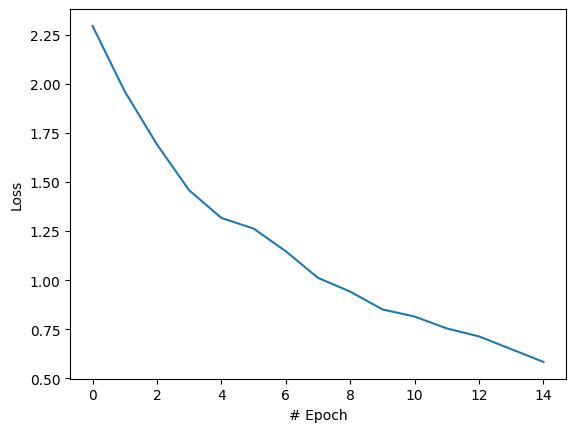

In [ ]:
# Ver la funcion de perdida en cada epoch
plt.xlabel("# Epoch");
plt.ylabel("Loss");
plt.plot(history_vgg16.history["loss"]);

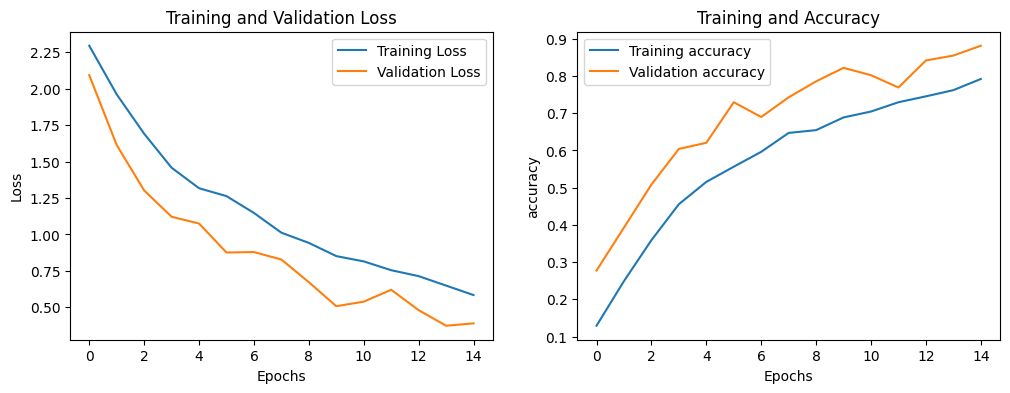

In [ ]:
# Graficar la pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_vgg16.history['loss'], label='Training Loss')
plt.plot(history_vgg16.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Graficar la métrica BinaryIoU
plt.subplot(1, 2, 2)
plt.plot(history_vgg16.history['accuracy'], label='Training accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

In [ ]:
# Evaluar el modelo
vgg16_eval = model_vgg16.evaluate(validation_generator)
print(f'Model VGG16 - Loss: {vgg16_eval[0]}, Accuracy: {vgg16_eval[1]}')

10/10 [==============================] - 19s 2s/step - loss: 0.3898 - accuracy: 0.8812
Model VGG16 - Loss: 0.3898434042930603, Accuracy: 0.8811880946159363


In [ ]:
from tensorflow.keras.models import load_model

# Cargar el modelo guardado
loaded_model_vgg16 = load_model('/content/drive/MyDrive/IA2/Proyecto_IA2/model_vgg16.h5')

#Adicionamos más epocas

In [ ]:
# Número adicional de épocas
ADDITIONAL_EPOCHS = 25

# Continuar el entrenamiento del modelo
history_model_vgg16_dditional = loaded_model_vgg16.fit(
    train_generator,
    epochs=ADDITIONAL_EPOCHS,
    validation_data=validation_generator
)

Epoch 1/25
38/38 [==============================] - 310s 8s/step - loss: 0.5953 - accuracy: 0.7943 - val_loss: 0.4636 - val_accuracy: 0.8251
Epoch 2/25
38/38 [==============================] - 300s 8s/step - loss: 0.6601 - accuracy: 0.7818 - val_loss: 0.4647 - val_accuracy: 0.8383
Epoch 3/25
38/38 [==============================] - 302s 8s/step - loss: 0.5693 - accuracy: 0.7902 - val_loss: 0.3896 - val_accuracy: 0.8680
Epoch 4/25
38/38 [==============================] - 318s 8s/step - loss: 0.5457 - accuracy: 0.7985 - val_loss: 0.3705 - val_accuracy: 0.8713
Epoch 5/25
38/38 [==============================] - 316s 8s/step - loss: 0.5339 - accuracy: 0.8235 - val_loss: 0.4029 - val_accuracy: 0.8482
Epoch 6/25
38/38 [==============================] - 298s 8s/step - loss: 0.4918 - accuracy: 0.8368 - val_loss: 0.2946 - val_accuracy: 0.8977
Epoch 7/25
38/38 [==============================] - 295s 8s/step - loss: 0.4452 - accuracy: 0.8426 - val_loss: 0.3036 - val_accuracy: 0.9043
Epoch 8/25
38

In [ ]:
loaded_model_vgg16.save('model_vgg16_additional.h5')

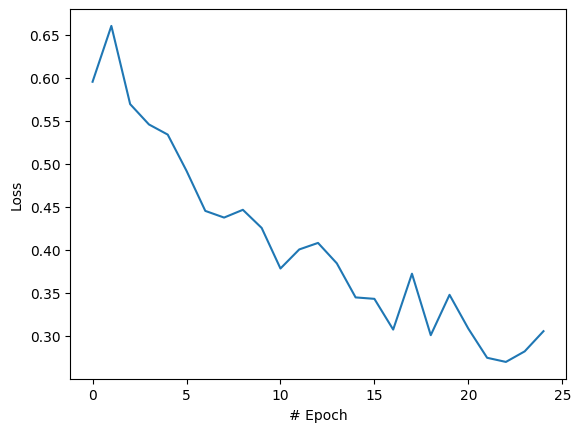

In [ ]:
# Ver la funcion de perdida en cada epoch
plt.xlabel("# Epoch");
plt.ylabel("Loss");
plt.plot(history_model_vgg16_dditional.history["loss"]);

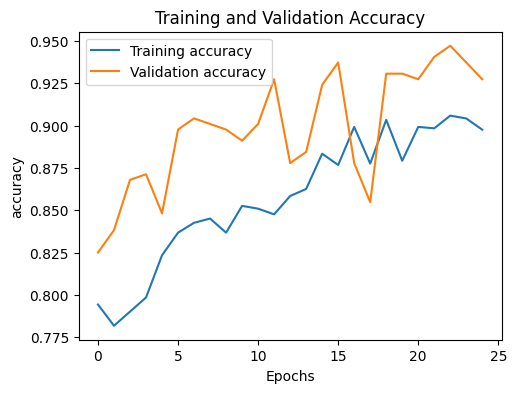

In [ ]:
# Graficar epocs 1-15
plt.figure(figsize=(12, 4))


# Graficar epocs 15-40
plt.subplot(1, 2, 2)
plt.plot(history_model_vgg16_dditional.history['accuracy'], label='Training accuracy')
plt.plot(history_model_vgg16_dditional.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

In [ ]:
# Evaluar el modelo
loaded_model_vgg16_eval = loaded_model_vgg16.evaluate(validation_generator)
print(f'Model VGG16 - Loss: {loaded_model_vgg16_eval[0]}, Accuracy: {loaded_model_vgg16_eval[1]}')

10/10 [==============================] - 20s 2s/step - loss: 0.2153 - accuracy: 0.9274
Model VGG16 - Loss: 0.2152743935585022, Accuracy: 0.9273927211761475


In [6]:
from tensorflow.keras.models import load_model

# Cargar el modelo guardado
loaded_model_vgg16_escogido = load_model('/content/drive/MyDrive/IA2/Proyecto_IA2/model_vgg16_additional.h5')

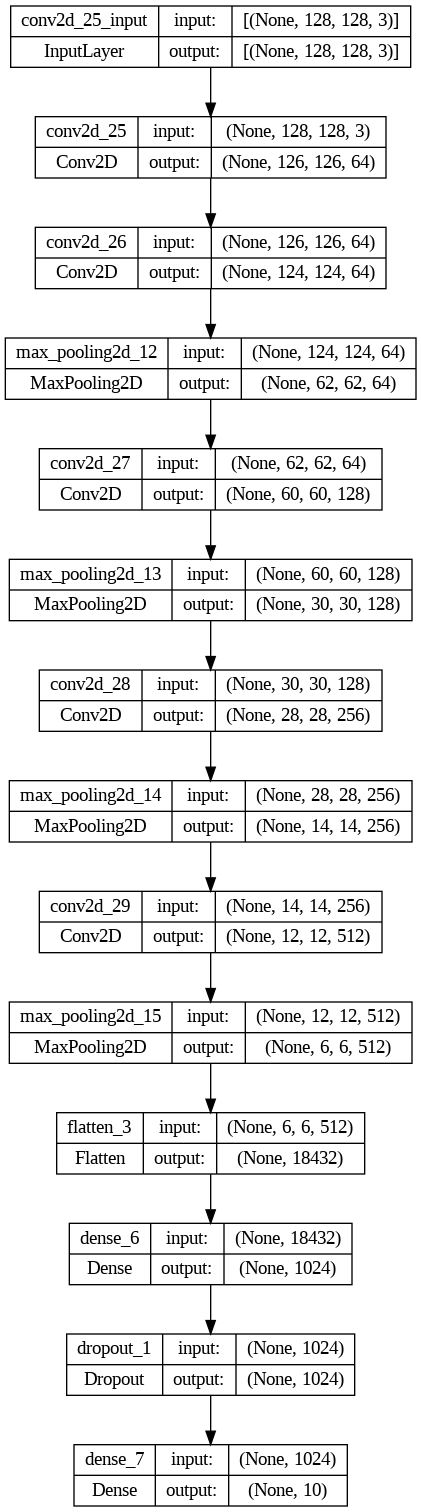

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(loaded_model_vgg16_escogido, to_file='vgg16_model.png', show_shapes=True, show_layer_names=True)
Image('vgg16_model.png')


1/1 [==============================] - 0s 264ms/step


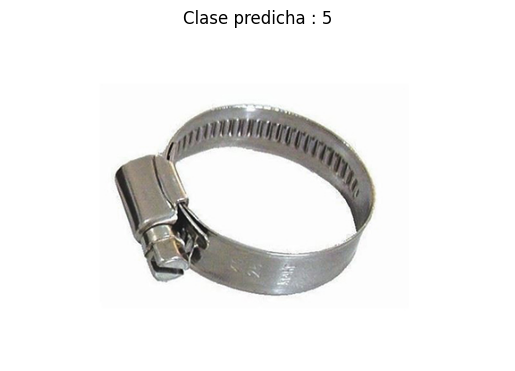

La imagen fue clasificada como: 5


In [14]:
from tensorflow.keras.preprocessing import image

# Ruta de la imagen de prueba
img_path = '/content/prueba9.jpg'

# Preprocesar la imagen
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalizar la imagen

# Hacer la predicción
prediction = loaded_model_vgg16_escogido.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title(f'Clase predicha : {predicted_class[0]}')
plt.show()

# Mostrar el resultado
print(f"La imagen fue clasificada como: {predicted_class[0]}")


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import numpy as np

# Evaluar el modelo en el conjunto de validación
results = loaded_model_vgg16_escogido.evaluate(validation_generator)
print("Validation Loss:", results[0])
print("Validation Accuracy:", results[1])

# Resetear el generador de validación
validation_generator.reset()

# Generar predicciones en el conjunto de validación
y_pred = []
y_true = []

# Recorrer todos los datos de validación
for i in range(len(validation_generator)):
    x, y = validation_generator[i]
    y_pred.extend(np.argmax(loaded_model_vgg16_escogido.predict(x), axis=1))
    y_true.extend(np.argmax(y, axis=1))

# Convertir a arrays numpy
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calcular métricas adicionales
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Informe de clasificación
class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)


10/10 [==============================] - 20s 2s/step - loss: 0.2153 - accuracy: 0.9274
Validation Loss: 0.2152743935585022
Validation Accuracy: 0.9273927211761475
1/1 [==============================] - 1s 1s/step
Accuracy: 0.9273927392739274
Precision: 0.9316892421706351
Recall: 0.9273927392739274
Confusion Matrix:
[[24  3  1  0  0  1  0  1  0  0]
 [ 0 29  0  0  0  0  0  0  0  0]
 [ 1  3 27  0  1  0  0  0  0  0]
 [ 0  0  0 29  0  1  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 1  0  0  1  0 28  0  0  0  0]
 [ 0  2  0  0  2  0 26  0  0  0]
 [ 0  0  2  0  0  0  0 28  0  0]
 [ 0  0  0  0  0  0  2  0 28  0]
 [ 0  0  0  0  0  0  0  0  0 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.78      1.00      0.88        29
           2       0.90      0.84      0.87        32
           3       0.97      0.97      0.97        30
           4       0.91      1.00      0.96        32
    